<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#zoom-in-to-values-smaller-than-80" data-toc-modified-id="zoom-in-to-values-smaller-than-80-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>zoom in to values smaller than 80</a></span></li></ul></div>

In [2]:
import sys
root_path = r'C:/Repos/HUJI/snpnmi/'
sys.path.append(root_path)
from utils.common import get_paths_helper
paths_helper = get_paths_helper()
print(paths_helper.data_folder,
paths_helper.classes_folder,
paths_helper.windows_folder,
paths_helper.windows_indexes_folder,
paths_helper.number_of_windows_per_class_path,
paths_helper.logs_folder,
paths_helper.logs_cluster_folder,
paths_helper.logs_cluster_jobs_stderr_template,
paths_helper.logs_cluster_jobs_stdout_template)


/vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/indexes/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/indexes/number_of_windows_per_class.txt /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/{job_type}/{job_name}.stderr /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/{job_type}/{job_name}.stdout


In [3]:
from utils.config import *

get_num_individuals()

929

/vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/indexes/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/vcf/hgdpclasses/windows/indexes/number_of_windows_per_class.txt /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/ /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/{job_type}/{job_name}.stderr /vol/sci/bio/data/gil.greenbaum/amir.rubin/logs/cluster/{job_type}/{job_name}.stdout


In [49]:
folder = r'C:\Data\HUJI\hgdp\hgdp_stats/'
#chr_name = 'chr9'
# TODO
chr_names_to_exclude = ['chrY', 'chrX']
chr_names_to_include = ['chr']

freq = '.freq.frq'
idepth = '.idepth.idepth'
imiss = '.imiss.imiss'

lmiss = '.lmiss.lmiss'
lmiss_col_name = 'F_MISS'

ldepth = '.ldepth.ldepth.mean'
ldepth_col_name = 'MEAN_DEPTH'

lqual = '.lqual.lqual'

i_stats = [imiss, idepth]
l_stats = [freq, lmiss, ldepth, lqual]

In [50]:
import pandas as pd

In [51]:
def get_stats_df(df, col_name):
    print('Min:',df[col_name].min(),'Max:',df[col_name].max())
    print('Mean:',df[col_name].mean(),'Std:',df[col_name].std())
    print(f'\tQuantiles for values to cap from below')
    for quantile in [.01,.05,.1,.15,.2]:
        print(f'\tQuantile {quantile}, value: {df[col_name].quantile(quantile)}')
    print(f'\tQuantiles for values to cap from above')
    for quantile in [ .8,.85,.9,.95,.99]:
        print(f'\tQuantile {quantile}, value: {df[col_name].quantile(quantile)}')
    df[col_name].hist(bins=100)


# Count number of bi-allelic per chr

In [33]:
#From the paper-
all_sites = 75310370
multi_allelic = 3085457
bi_allelic = all_sites - multi_allelic
bi_allelic

72224913

In [35]:
sum_rows

74899377

In [ ]:
sum_rows = 0
for filename in os.listdir(folder):
     if filename.endswith('.ldepth.ldepth.mean'):
        # first row is header
        n_rows = len(list(open(folder+ filename))) - 1 
        print(n_rows, 'rows in ', os.path.join(filename))    
        sum_rows+=n_rows
print(sum_rows, 'in total')

In [34]:
chr_x = 2547712
chr_y = 126752 
print( 'no x' , sum_rows - chr_x)
print( 'no y' , sum_rows - chr_y)
print( 'no x and y' , sum_rows - chr_y - chr_x)

no x 72351665
no y 74772625
no x and y 72224913


# Load data

In [59]:
import os
def get_dfs_of_stat_type(stat_type_suffix, col_name, preprocess_df = lambda x : x):
    dfs = []
    for filename in os.listdir(folder):
        print(os.path.join(filename))
        if filename.endswith(stat_type_suffix) \
        and all([exclude+'.' not in filename for exclude in chr_names_to_exclude]) \
        and any([include+'.' in filename for include in chr_names_to_include]):
            print(os.path.join(filename))
            chr_df = pd.read_csv(folder+filename, sep='\t')
            chr_df = preprocess_df(chr_df)
            get_stats_df(chr_df, col_name)
            print(f'file: {filename}, length: {len(chr_df)}')
            dfs.append(chr_df)
    return pd.concat(dfs)



# Process sites miss (lmiss)

In [60]:
lmiss_df

,CHR,POS,N_DATA,N_GENOTYPE_FILTERED,N_MISS,F_MISS
0,chr1,10135,1858,0,1228,0.660926
1,chr1,10144,1858,0,1538,0.827772
2,chr1,10145,1858,0,1544,0.831001
3,chr1,10146,1858,0,1680,0.904198
4,chr1,10150,1858,0,1792,0.964478
...,...,...,...,...,...,...
6137751,chr2,242183396,1858,0,1854,0.997847
6137752,chr2,242183401,1858,0,1334,0.717976
6137753,chr2,242183413,1858,0,1308,0.703983
6137754,chr2,242183419,1858,0,1330,0.715823


chr1.freq.frq
chr1.ldepth.ldepth.mean
chr1.ldepth.log
chr1.lmiss.lmiss
chr1.lmiss.lmiss
Min: 0.0 Max: 0.9989239999999999
Mean: 0.08557897627266584 Std: 0.21690249053214203
	Quantiles for values to cap from below
	Quantile 0.01, value: 0.0
	Quantile 0.05, value: 0.0
	Quantile 0.1, value: 0.0
	Quantile 0.15, value: 0.0
	Quantile 0.2, value: 0.0
	Quantiles for values to cap from above
	Quantile 0.8, value: 0.027987099999999997
	Quantile 0.85, value: 0.115178
	Quantile 0.9, value: 0.359526
	Quantile 0.95, value: 0.692142
	Quantile 0.99, value: 0.956943
file: chr1.lmiss.lmiss, length: 6043456
chr1.lmiss.log
chr10.ldepth.ldepth.mean
chr10.ldepth.log
chr10.lmiss.lmiss
chr10.lmiss.lmiss
Min: 0.0 Max: 0.9989239999999999
Mean: 0.06067631472325107 Std: 0.18568625405933836
	Quantiles for values to cap from below
	Quantile 0.01, value: 0.0
	Quantile 0.05, value: 0.0
	Quantile 0.1, value: 0.0
	Quantile 0.15, value: 0.0
	Quantile 0.2, value: 0.0
	Quantiles for values to cap from above
	Quantile 0.8, 

file: chr21.lmiss.lmiss, length: 1039199
chr21.lmiss.log
chr22.frq
chr22.ldepth.ldepth.mean
chr22.ldepth.log
chr22.lmiss.lmiss
chr22.lmiss.lmiss
Min: 0.0 Max: 0.9989239999999999
Mean: 0.1041667968996732 Std: 0.22187634882871163
	Quantiles for values to cap from below
	Quantile 0.01, value: 0.0
	Quantile 0.05, value: 0.0
	Quantile 0.1, value: 0.0
	Quantile 0.15, value: 0.00107643
	Quantile 0.2, value: 0.00107643
	Quantiles for values to cap from above
	Quantile 0.8, value: 0.12378900000000001
	Quantile 0.85, value: 0.23681399999999997
	Quantile 0.9, value: 0.41765299999999994
	Quantile 0.95, value: 0.705059
	Quantile 0.99, value: 0.947255
file: chr22.lmiss.lmiss, length: 1129210
chr22.lmiss.log
chr3.ldepth.ldepth.mean
chr3.ldepth.log
chr3.lmiss.lmiss
chr3.lmiss.lmiss
Min: 0.0 Max: 0.9989239999999999
Mean: 0.042095108529182766 Std: 0.1458943895305253
	Quantiles for values to cap from below
	Quantile 0.01, value: 0.0
	Quantile 0.05, value: 0.0
	Quantile 0.1, value: 0.0
	Quantile 0.15, val

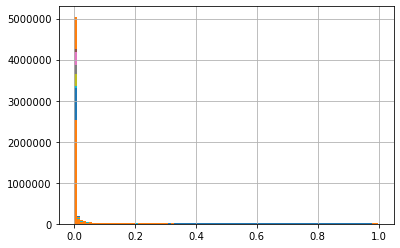

In [61]:
lmiss_df = get_dfs_of_stat_type(lmiss, lmiss_col_name)


72224913
Min: 0.0 Max: 0.9989239999999999
Mean: 0.05857232144973973 Std: 0.17774271936541666
	Quantiles for values to cap from below
	Quantile 0.01, value: 0.0
	Quantile 0.05, value: 0.0
	Quantile 0.1, value: 0.0
	Quantile 0.15, value: 0.0
	Quantile 0.2, value: 0.0
	Quantiles for values to cap from above
	Quantile 0.8, value: 0.00968784
	Quantile 0.85, value: 0.032292799999999997
	Quantile 0.9, value: 0.14208800000000002
	Quantile 0.95, value: 0.486545
	Quantile 0.99, value: 0.9278790000000001


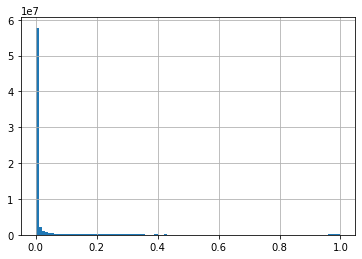

In [62]:
print(len(lmiss_df))
get_stats_df(lmiss_df, lmiss_col_name)

In [71]:
total = len(lmiss_df)
for p_of_missing in [float(v)/10 for v in range(1,10)]:
    over_p_missing = len(lmiss_df[lmiss_df[lmiss_col_name]>p_of_missing])
    print(p_of_missing, 'missing - ', float(over_p_missing)/total*100, '% are removed which are', over_p_missing )

0.1 missing -  11.235080338552986 % are removed which are 8114527
0.2 missing -  8.7146134741623 % are removed which are 6294122
0.3 missing -  7.132224582949654 % are removed which are 5151243
0.4 missing -  5.909307222010776 % are removed which are 4267992
0.5 missing -  4.866277928226788 % are removed which are 3514665
0.6 missing -  3.93933184800098 % are removed which are 2845179
0.7 missing -  3.0576679268551006 % are removed which are 2208398
0.8 missing -  2.1553920044181987 % are removed which are 1556730
0.9 missing -  1.2441911837263133 % are removed which are 898616


In [68]:
over_10p_missing

8114527

In [69]:
total

72224913

In [67]:
float(over_10p_missing)/total

0.11235080338552987

In [38]:
for max_v in range(0,100,5):
    max_v_p = float(max_v)/100
    print(f'Below max miss {max_v_p}: {len(lmiss_df[lmiss_df[lmiss_col_name]<max_v_p])}')

Below max miss 0.0: 0
Below max miss 0.05: 64693641
Below max miss 0.1: 66393917
Below max miss 0.15: 67451720
Below max miss 0.2: 68262512
Below max miss 0.25: 68904836
Below max miss 0.3: 69439002
Below max miss 0.35: 69921292
Below max miss 0.4: 70355893
Below max miss 0.45: 70769489
Below max miss 0.5: 71150210
Below max miss 0.55: 71516510
Below max miss 0.6: 71874837
Below max miss 0.65: 72203029
Below max miss 0.7: 72531569
Below max miss 0.75: 72857516
Below max miss 0.8: 73196236
Below max miss 0.85: 73530370
Below max miss 0.9: 73864909
Below max miss 0.95: 74196646


# Process sites depth (ldepth)

chr1.ldepth.ldepth.mean
Min: 0.0247578 Max: 5146.5
Mean: 34.60038999896287 Std: 29.789437704832853
	Quantile 0.8, value: 37.2777
	Quantile 0.85, value: 37.7158
	Quantile 0.9, value: 38.2734
	Quantile 0.95, value: 39.1744
	Quantile 0.99, value: 64.3025
file: chr1.ldepth.ldepth.mean, length: 6043456
chr10.ldepth.ldepth.mean
Min: 0.00753498 Max: 3874.93
Mean: 34.956434901456056 Std: 24.347763724377053
	Quantile 0.8, value: 37.1464
	Quantile 0.85, value: 37.5856
	Quantile 0.9, value: 38.1335
	Quantile 0.95, value: 38.972
	Quantile 0.99, value: 48.4715
file: chr10.ldepth.ldepth.mean, length: 3547800
chr11.ldepth.ldepth.mean
Min: 0.011840700000000001 Max: 297.853
Mean: 33.627475441126954 Std: 6.745581779649894
	Quantile 0.8, value: 37.0786
	Quantile 0.85, value: 37.4995
	Quantile 0.9, value: 38.0118
	Quantile 0.95, value: 38.7438
	Quantile 0.99, value: 40.1798
file: chr11.ldepth.ldepth.mean, length: 3503085
chr12.ldepth.ldepth.mean
Min: 0.012917099999999999 Max: 747.7
Mean: 34.04957847935299

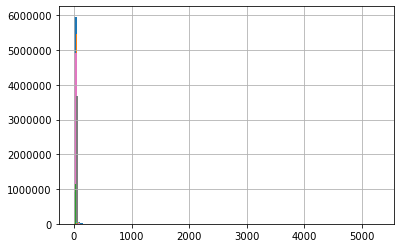

In [12]:
ldepth_df = get_dfs_of_stat_type(ldepth, ldepth_col_name)


74772625
Min: 0.00753498 Max: 5292.96
Mean: 33.825968247183475 Std: 16.79223765990842
	Quantile 0.8, value: 37.0301
	Quantile 0.85, value: 37.4822
	Quantile 0.9, value: 38.0398
	Quantile 0.95, value: 38.8816
	Quantile 0.99, value: 44.1991


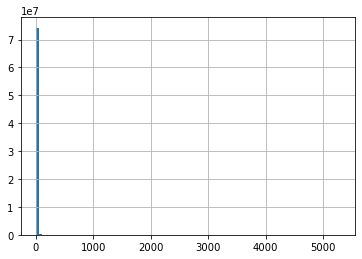

In [13]:
print(len(ldepth_df))
get_stats_df(ldepth_df, ldepth_col_name)

## zoom in to values smaller than 80

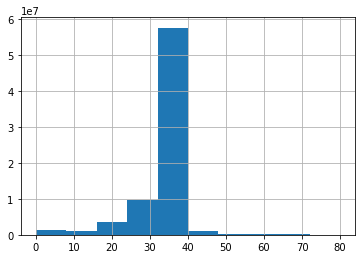

In [15]:
ldepth_df[ldepth_df[ldepth_col_name]<80][ldepth_col_name].hist()

In [23]:
for min_v in range(0,100,10):
    print(f'Above min depth {min_v}: {len(ldepth_df[ldepth_df[ldepth_col_name]>min_v])}')

Above min depth 0: 74772625
Above min depth 10: 73290094
Above min depth 20: 71484216
Above min depth 30: 63996049
Above min depth 40: 1566058
Above min depth 50: 580364
Above min depth 60: 410516
Above min depth 70: 285379
Above min depth 80: 211179
Above min depth 90: 158757


# Analyze freq

In [3]:
f = folder + 'chr22.frq'
frq = pd.read_csv(f, sep='\t')
frq

,CHROM,POS,N_ALLELES,N_CHR,{ALLELE:FREQ}
chr22,10510212,2,338,A:0.997041,T:0.00295858
chr22,10510232,2,368,A:0.997283,G:0.00271739
chr22,10510355,2,324,AT:0.987654,A:0.0123457
chr22,10510356,2,360,T:0.0694444,A:0.930556
chr22,10510369,2,444,G:0.997748,A:0.00225225
...,...,...,...,...,...
chr22,50808246,2,6,C:0.5,A:0.5
chr22,50808258,2,2,G:0.5,A:0.5
chr22,50808262,2,44,T:0.977273,TA:0.0227273
chr22,50808263,2,4,A:0.5,C:0.5


In [14]:
def get_f(s):
    return s.split(':')[1]
frq['FREQ'] = frq['{ALLELE:FREQ}'].apply(get_f).astype(float)
frq

,CHROM,POS,N_ALLELES,N_CHR,{ALLELE:FREQ},FREQ
chr22,10510212,2,338,A:0.997041,T:0.00295858,0.002959
chr22,10510232,2,368,A:0.997283,G:0.00271739,0.002717
chr22,10510355,2,324,AT:0.987654,A:0.0123457,0.012346
chr22,10510356,2,360,T:0.0694444,A:0.930556,0.930556
chr22,10510369,2,444,G:0.997748,A:0.00225225,0.002252
...,...,...,...,...,...,...
chr22,50808246,2,6,C:0.5,A:0.5,0.500000
chr22,50808258,2,2,G:0.5,A:0.5,0.500000
chr22,50808262,2,44,T:0.977273,TA:0.0227273,0.022727
chr22,50808263,2,4,A:0.5,C:0.5,0.500000


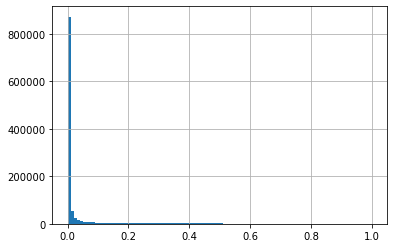

In [39]:
h = frq['FREQ'].hist(bins=100)
h

In [40]:
total

1129210

In [29]:
total-867964

261246

In [46]:
import numpy as np
bucket_size=1000
bins = [float(v)/bucket_size for v in range(bucket_size+1)]
count, division = np.histogram(frq['FREQ'], bins = bins)
total = sum(count)
per = [float(v)/total for v in count]
per

[0.3745503493592866,
 0.17901807458311564,
 0.07232401413377494,
 0.04360482106959733,
 0.02927710523286191,
 0.0215407231604396,
 0.01337040940126283,
 0.013535126327255337,
 0.011712613242886619,
 0.009713870759203337,
 0.008268612569849718,
 0.007220091922671602,
 0.006127292531947113,
 0.004643069048272686,
 0.004938851055162459,
 0.004677606468238857,
 0.004234819032775126,
 0.003821255568052001,
 0.0035254735611622286,
 0.002917969199705989,
 0.0026275006420417813,
 0.002786018543937797,
 0.0027284561773275122,
 0.002389281001762294,
 0.0021342354389351846,
 0.002027966454423889,
 0.0020182251308436872,
 0.0017189008244702048,
 0.0018198563597559357,
 0.0018384534320454123,
 0.0019907723098449358,
 0.001751667094694521,
 0.0015656963717997538,
 0.0014488004888373288,
 0.0012300634957182455,
 0.0013292478812621212,
 0.0012406903941693751,
 0.0012433471187821574,
 0.001206152974203204,
 0.0011193666368523127,
 0.001173386703978888,
 0.0009847592564713383,
 0.0009767890826329912,
 0

# Per metric stats

In [22]:
def get_stats(metric, col_name):
    df = pd.read_csv(folder+chr_name+metric, sep='\t')
    get_stats_df(df, col_name)

In [ ]:
#idepth - mean
col_name = 'MEAN_DEPTH'
get_stats(idepth, col_name)


In [ ]:
#ldepth - mean
col_name = 'MEAN_DEPTH'
get_stats(ldepth, col_name)
#df[col_name].hist(bins=100)

In [ ]:
sites = len(df)
throw = len(df[df[col_name]>20])
float(throw)/sites

In [ ]:
#imiss
col_name = 'F_MISS'
get_stats(imiss, col_name)

In [ ]:
#lmiss
col_name = 'F_MISS'
get_stats(lmiss, col_name)

In [ ]:
df = pd.read_csv(folder+chr_name+lmiss, sep='\t')
print('Min:',df[col_name].min(),'Max:',df[col_name].max())
print('Mean:',df[col_name].mean(),'Std:',df[col_name].std())
sites = len(df)
throw = len(df[df[col_name]<=0.1])
f'{float(throw)/sites*100:.3f}%'

In [ ]:
#lqual
col_name = 'QUAL'
get_stats(lqual, col_name)

In [ ]:
# TODO - Or - what are the values?
# TODO -is it minQ or minGQ
# TODO - check if there is a QUAL filter>30, run stats any how :-)
df = pd.read_csv(folder+chr_name+lqual, sep='\t')
print('Min:',df[col_name].min(),'Max:',df[col_name].max())
print('Mean:',df[col_name].mean(),'Std:',df[col_name].std())
sites = len(df)
throw = len(df[df[col_name]<=30])
f'{float(throw)/sites*100:.3f}%'

'class' - maf - 1-2% vs all
maf - 49-50% vs all

100 'samples' from class - each sample holds N slices, randomly selected
sample size?
'slices' - a set of X sites from the same class.
size of slices dependes on classes sizes - maybe use slices of size 10? 100? 

Instead of num_of_sites matrixes we have num_of_slices matrixes



